c:\Users\HP\Desktop\week_4\kaim-week-4\scripts\store_analysis.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path)


Promo Distribution in Training Set:
0    0.627575
1    0.372425
Name: Promo, dtype: float64


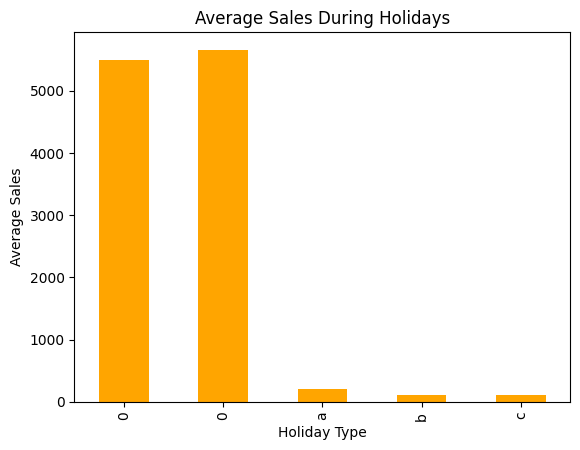

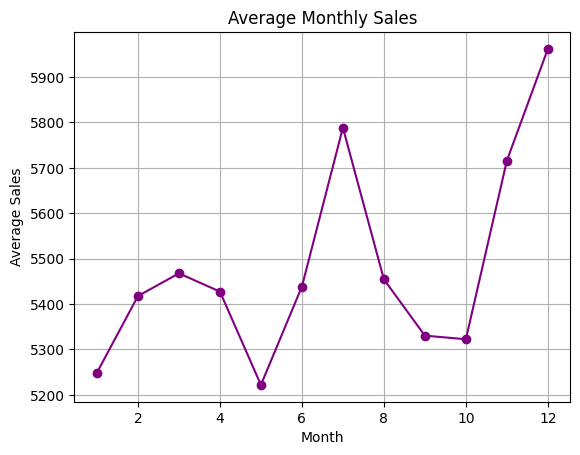

Correlation between Sales and Customers: 0.89


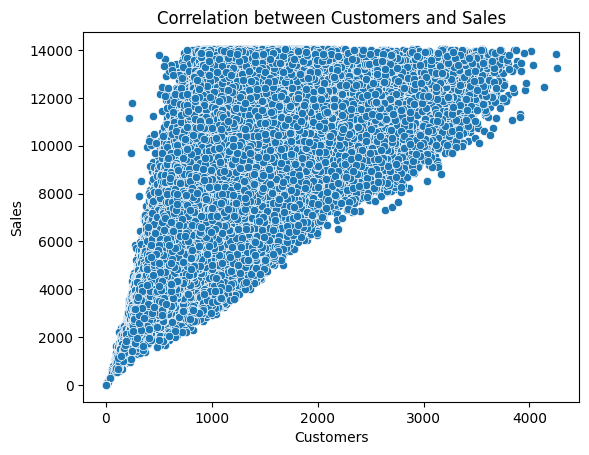

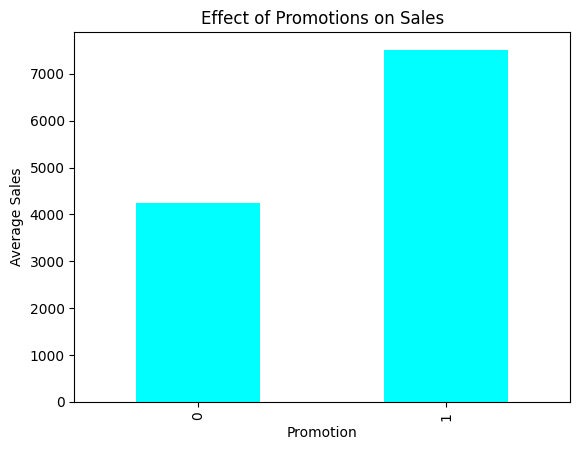

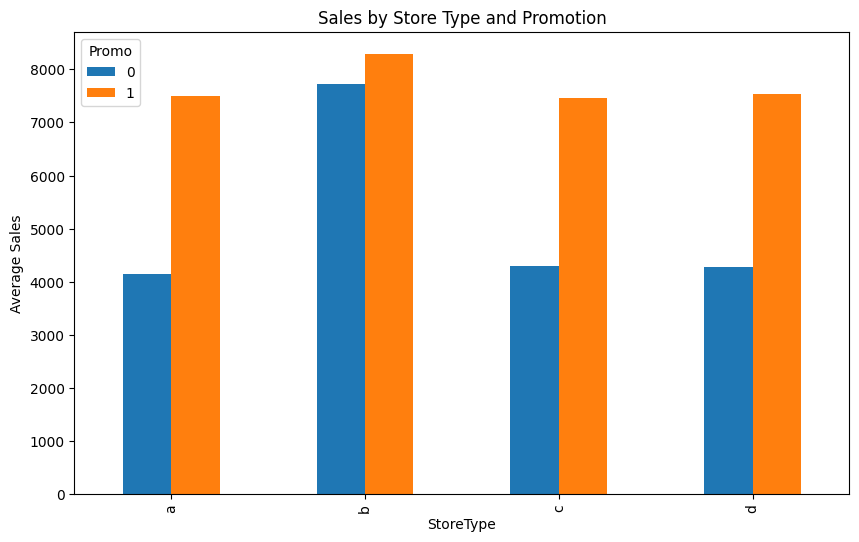

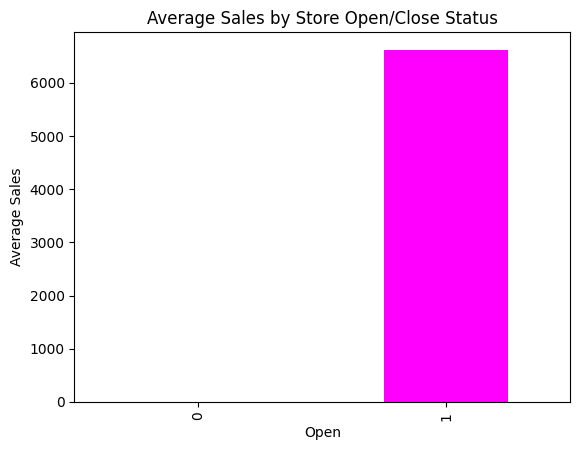

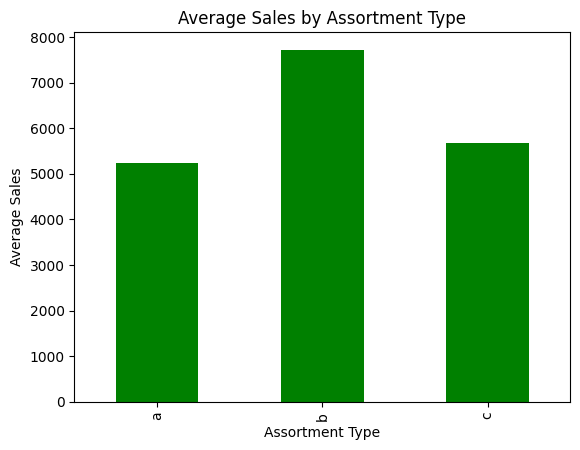

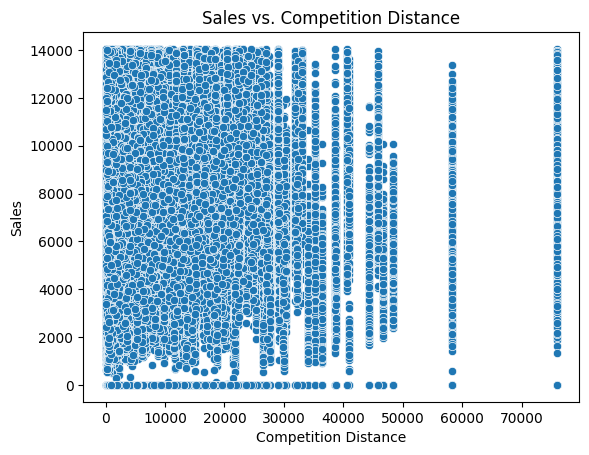

c:\Users\HP\Desktop\week_4\kaim-week-4\scripts\store_analysis.py:148: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='CompetitionOpenSince', y='Sales', ci=None)


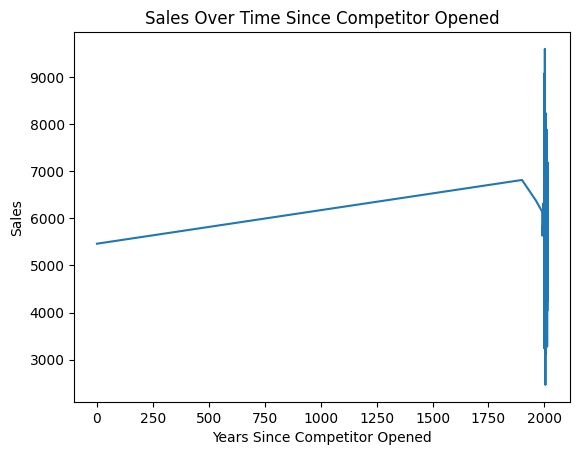

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import sys
import os
from datetime import datetime
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
from store_analysis import *
# Set up logging
logging.basicConfig(
    filename='exploratory_analysis.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

logging.info("Starting analysis.")

train_path = '../data/train.csv'  
store_path = '../data/store.csv'  

# Load datasets
train_data, store_data = load_data(train_path, store_path)

# Merge store and train data
data = merge_data(train_data, store_data)

# Preprocess
data = preprocess_data(data)

# Plot
plot_promo_distribution(data)
plot_holiday_effects(data)
plot_seasonal_effects(data)
plot_correlation(data)
plot_promo_effect(data)
plot_store_promo_effect(data)
plot_opening_closing_effect(data)
plot_assortment_effect(data)
plot_competition_distance_effect(data)
plot_competitor_openings_effect(data) 

# Save cleaned data
logging.info("Saving cleaned dataset.")
data.to_csv('cleaned_data.csv', index=False)
logging.info("Analysis completed.")


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('../data/train.csv')

# Isolate the required time series columns (Date and Sales)
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Sales']].sort_values('Date')

# Handle missing values
data.dropna(inplace=True)

# Step 1: Check if the data is stationary
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1] > 0.05

is_non_stationary = check_stationarity(data['Sales'])

if is_non_stationary:
    print("The data is non-stationary. Differencing will be applied.")
    data['Sales_diff'] = data['Sales'].diff().dropna()
else:
    print("The data is stationary.")
    data['Sales_diff'] = data['Sales']

# Step 2: Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data['Sales_diff'].dropna(), lags=20, ax=plt.gca())
plt.title("Autocorrelation")
plt.subplot(1, 2, 2)
plot_pacf(data['Sales_diff'].dropna(), lags=20, ax=plt.gca())
plt.title("Partial Autocorrelation")
plt.tight_layout()
plt.show()

# Step 3: Transform time series into supervised learning data
def create_lagged_features(data, target_column, lags=5):
    df = pd.DataFrame()
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = data[target_column].shift(lag)
    df['target'] = data[target_column]
    df.dropna(inplace=True)
    return df

supervised_data = create_lagged_features(data, target_column='Sales_diff', lags=5)

# Step 4: Scale the data to (-1, 1) range
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_data)

# Split into features (X) and target (y)
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

# Reshape X for LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 5: Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# Step 6: Make predictions
predictions = model.predict(X)
predicted_sales = scaler.inverse_transform(
    np.concatenate([X[:, :, 0], predictions], axis=1)
)[:, -1]

# Step 7: Save predictions to a CSV file
output = pd.DataFrame({
    'Date': data['Date'].iloc[-len(predicted_sales):],
    'Predicted_Sales': predicted_sales
})
output.to_csv('lstm_sales_predictions.csv', index=False)

print("Predictions saved to 'lstm_sales_predictions.csv'.")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
    app.start()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 712, 

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
    app.start()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 712, 

AttributeError: _ARRAY_API not found

C:\Users\HP\AppData\Local\Temp\ipykernel_3616\2963920094.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/train.csv')


MemoryError: Unable to allocate 504. MiB for an array with shape (65, 1017087) and data type float64

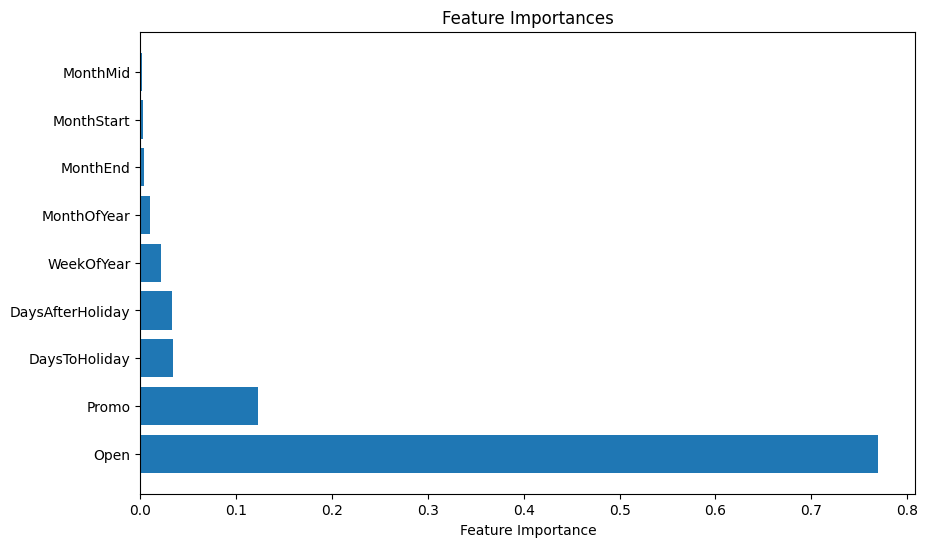

In [3]:
# 2.2 build model
import matplotlib.pyplot as plt
import numpy as np

# Extract the feature importances from the trained model
importances = pipeline.named_steps['model'].feature_importances_

# Define the feature names
features = numerical_cols

# Sort the features by their importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(features)), importances[indices], align="center")
plt.yticks(range(len(features)), np.array(features)[indices])
plt.xlabel("Feature Importance")
plt.show()


In [4]:
from sklearn.utils import resample
import numpy as np

# Function to perform bootstrap resampling and calculate confidence intervals
def bootstrap_confidence_intervals(model, X_train, y_train, X_test, n_iterations=1000, ci=95):
    predictions = []

    # Perform bootstrap resampling
    for _ in range(n_iterations):
        # Create a bootstrap sample
        X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
        
        # Fit the model on the bootstrap sample
        model.fit(X_resampled, y_resampled)
        
        # Get predictions on the test set
        y_pred = model.predict(X_test)
        predictions.append(y_pred)

    # Convert predictions to a numpy array
    predictions = np.array(predictions)

    # Calculate the lower and upper percentiles for the confidence interval
    lower = np.percentile(predictions, (100 - ci) / 2, axis=0)
    upper = np.percentile(predictions, 100 - (100 - ci) / 2, axis=0)

    return lower, upper

# Extract the model from the pipeline
model = pipeline.named_steps['model']

# Perform bootstrap resampling and calculate confidence intervals
lower, upper = bootstrap_confidence_intervals(model, X_train, y_train, X_val)

# Print the first 10 predictions and their confidence intervals
for i in range(10):
    print(f"Prediction: {y_pred[i]}, CI: [{lower[i]}, {upper[i]}]")


KeyboardInterrupt: 

In [15]:
import pickle
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')

# Define the filename with the timestamp
model_filename = f'model-{timestamp}.pkl'

# Save the trained pipeline to a file
with open(model_filename, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Model saved as {model_filename}")


Model saved as model-03-01-2025-12-36-52-917225.pkl


In [17]:
import pandas as pd

# Load the data
train = pd.read_csv('../data/train.csv')

# Ensure the data is sorted by date
train['Date'] = pd.to_datetime(train['Date'])
train = train.sort_values('Date')

# Extract time series data (Date, Sales)
time_series_data = train[['Date', 'Sales']]


C:\Users\HP\AppData\Local\Temp\ipykernel_14916\2182808431.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Fix for potential NumPy import errors
# try:
#     import numpy as np
# except ImportError:
#     import subprocess
#     subprocess.check_call(['pip', 'install', 'numpy'])

# Step 1: Load the data
data = pd.read_csv("../data/train.csv")
data = data[['Date', 'Sales']]
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data = data.set_index('Date')

# Handle missing values
data['Sales'] = data['Sales'].fillna(method='ffill')

# Normalize sales data
scaler = MinMaxScaler()
data['Sales'] = scaler.fit_transform(data[['Sales']])

# Step 2: Prepare the data for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30  # Use 30 days of sales to predict the next day
sales_data = data['Sales'].values
X, y = create_sequences(sales_data, sequence_length)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM input
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]

# Step 3: Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Step 5: Evaluate and visualize
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_val)

# Rescale predictions back to original scale
y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_val_rescaled, label='Actual Sales')
plt.plot(y_pred_rescaled, label='Predicted Sales')
plt.legend()
plt.show()


In [ ]:
time_series_data['Sales_diff'] = time_series_data['Sales'].diff().dropna()

# Check stationarity again
check_stationarity(time_series_data['Sales_diff'].dropna())


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(time_series_data['Sales_diff'].dropna(), lags=30)
plt.show()

plot_pacf(time_series_data['Sales_diff'].dropna(), lags=30)
plt.show()


In [ ]:
def create_supervised_data(series, lag=1):
    df = pd.DataFrame(series)
    df['y'] = df.shift(-lag)
    return df.dropna()

supervised_data = create_supervised_data(time_series_data['Sales_diff'].dropna())


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_data)

X = scaled_data[:, :-1]  # Features
y = scaled_data[:, -1]   # Target


In [ ]:
import numpy as np

X = X.reshape((X.shape[0], 1, X.shape[1]))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)


In [ ]:
# Make predictions
predicted_sales = model.predict(X)

# Inverse transform predictions to original scale
predicted_sales = scaler.inverse_transform(predicted_sales)


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Sales'][-len(predicted_sales):].values, label='Actual Sales')
plt.plot(predicted_sales, label='Predicted Sales', linestyle='dashed')
plt.legend()
plt.show()